In [9]:
# Imports
import torch
import torchvision

In [10]:
dataset = torchvision.datasets.CIFAR10(root='data/', download=True)

Files already downloaded and verified


In [11]:

len(dataset)

50000

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
image,label= dataset[0]
print(image.shape)#here 3 is the number of rgb channels so total data for a single image = 32*32*3 unlike mnist 784

torch.Size([3, 32, 32])


label: 2
torch.Size([3, 32, 32])


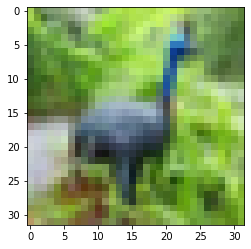

In [87]:
plt.imshow(image.moveaxis(0, -1)) #here we moved the channels to the right-end according to the displaying convention
#otherwise it will show an error
print('label:',label)

In [77]:
import torchvision.transforms as transforms
dataset = torchvision.datasets.CIFAR10(root='data/', 
                train=True,
                transform=transforms.ToTensor())

label: 2


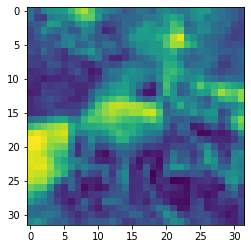

In [79]:
image,label= dataset[6]
plt.imshow(image[0,:,:])#here we are displaying the one out of three rgb channels
print('label:',label)

In [21]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [45000, 5000]) #5000 is the test set
len(train_ds), len(val_ds)

(45000, 5000)

In [22]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([3, 32, 32]) 6


In [23]:
print(img_tensor[0,10:15,10:15])
print(img_tensor.shape, label)
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.3137, 0.3804, 0.3529, 0.3843, 0.5373],
        [0.4353, 0.5725, 0.5333, 0.6392, 0.6627],
        [0.5412, 0.8353, 0.6980, 0.7490, 0.8275],
        [0.6471, 0.8980, 0.7176, 0.7490, 0.9373],
        [0.7529, 0.7255, 0.5686, 0.7961, 0.8745]])
torch.Size([3, 32, 32]) 6
tensor(1.) tensor(0.)


In [24]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)#dataloader divides the data into the batch sizes of
#128
val_loader = DataLoader(val_ds, batch_size)

In [74]:
import torch.nn as nn

input_size = 3*32*32 #the image size is 32*32 
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [75]:
print(model.weight.shape)# weight here is then used as data * weighttranspose

torch.Size([10, 3072])


In [36]:
print(model.weight)#these weights are the random weights now they are to be changed by training the model
print(model.bias)

Parameter containing:
tensor([[-0.0300, -0.0114, -0.0173,  ...,  0.0123,  0.0146, -0.0208],
        [-0.0129,  0.0152,  0.0131,  ..., -0.0016,  0.0212,  0.0282],
        [-0.0156,  0.0068, -0.0061,  ...,  0.0035, -0.0294, -0.0080],
        ...,
        [ 0.0280,  0.0240, -0.0146,  ..., -0.0204,  0.0234,  0.0278],
        [-0.0034, -0.0252,  0.0073,  ..., -0.0113,  0.0018, -0.0229],
        [-0.0250,  0.0203,  0.0268,  ...,  0.0261, -0.0193,  0.0015]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0055, -0.0147,  0.0254, -0.0184, -0.0005, -0.0150,  0.0136,  0.0006,
        -0.0148,  0.0133], requires_grad=True)


In [83]:
for images, labels in train_loader:# train loader here is the training dataset divided into random nos 
    #and batches of 128
    print(labels)
    print(images.shape)
    outputs = model(images)#here it throws an error because the shape of the image does not match that of the
    #input of the model
    print(outputs)
    break

tensor([4, 2, 6, 1, 3, 3, 5, 9, 7, 8, 2, 2, 7, 8, 4, 8, 7, 1, 4, 0, 0, 6, 2, 2,
        4, 5, 8, 3, 0, 3, 4, 4, 4, 0, 2, 9, 5, 7, 4, 5, 4, 0, 5, 8, 5, 6, 8, 0,
        6, 3, 2, 4, 6, 4, 0, 6, 3, 7, 8, 1, 1, 8, 0, 0, 1, 5, 6, 0, 8, 7, 8, 8,
        0, 7, 6, 9, 3, 2, 1, 2, 2, 3, 0, 2, 7, 4, 1, 5, 5, 2, 3, 7, 5, 6, 6, 8,
        7, 7, 2, 8, 6, 0, 8, 3, 8, 5, 4, 2, 8, 5, 1, 2, 0, 4, 6, 1, 1, 0, 0, 0,
        1, 5, 0, 2, 6, 2, 6, 1])
torch.Size([128, 3, 32, 32])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (12288x32 and 3072x10)

In [89]:
#one of the method to solve the problem is to reshape each batch inside the lopp itself
#but the other is more prefered as it reshapes the image in the class itself
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(128,3072))
    print(outputs)
    break

tensor([4, 3, 7, 9, 7, 6, 0, 7, 3, 5, 3, 8, 7, 4, 1, 6, 5, 8, 7, 6, 6, 8, 5, 4,
        6, 6, 0, 5, 4, 3, 5, 8, 1, 4, 5, 9, 6, 3, 7, 8, 4, 9, 1, 9, 1, 2, 1, 8,
        9, 1, 5, 0, 0, 7, 5, 8, 5, 6, 5, 4, 4, 9, 7, 8, 4, 7, 1, 3, 6, 1, 0, 5,
        1, 6, 0, 3, 1, 3, 3, 3, 4, 0, 6, 7, 4, 9, 2, 9, 2, 3, 0, 6, 1, 1, 4, 9,
        8, 7, 6, 3, 4, 3, 3, 8, 1, 3, 5, 3, 8, 9, 9, 4, 8, 3, 6, 1, 1, 7, 7, 9,
        5, 4, 6, 4, 2, 3, 2, 4])
torch.Size([128, 3, 32, 32])
tensor([[-0.0094,  0.1675, -0.1656,  ..., -0.1466, -0.2476, -0.1145],
        [-0.1197,  0.3122, -0.7159,  ..., -0.1928, -0.4667, -0.1926],
        [ 0.0686,  0.2556, -0.5027,  ..., -0.2279, -0.4349, -0.3454],
        ...,
        [-0.1069,  0.2136, -0.6712,  ..., -0.2316, -0.2004, -0.1296],
        [-0.0859,  0.2627, -0.4854,  ..., -0.0450, -0.3756, -0.1001],
        [-0.0335,  0.2882, -0.4228,  ..., -0.1645, -0.3970, -0.0851]],
       grad_fn=<AddmmBackward0>)


In [120]:
class Cifar10Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb): #NOTE: here the forward method is called automatically by default like a constructor
        xb = xb.reshape(-1,3072)
        out = self.linear(xb)
        return out
    
model = Cifar10Model()

In [94]:
for images, labels in train_loader:# train loader here is the training dataset divided into random nos 
    #and batches of 128
    print(labels)
    print(images.shape)
    outputs = model(images)#here it throws an error because the shape of the image does not match that of the
    #input of the model
    print(outputs)
    break#breaks after loading just 1 batch

tensor([3, 7, 5, 7, 3, 8, 9, 7, 3, 8, 3, 1, 2, 3, 1, 6, 7, 0, 4, 5, 5, 9, 8, 2,
        9, 0, 1, 8, 7, 1, 0, 7, 5, 8, 3, 2, 5, 7, 3, 6, 6, 8, 3, 5, 9, 3, 9, 6,
        5, 8, 9, 9, 0, 5, 7, 8, 0, 6, 5, 6, 8, 1, 7, 2, 6, 6, 6, 6, 6, 0, 1, 1,
        6, 0, 1, 8, 0, 4, 0, 5, 5, 9, 0, 0, 2, 2, 3, 1, 5, 5, 2, 9, 8, 1, 3, 3,
        6, 6, 3, 9, 8, 7, 2, 4, 2, 0, 8, 3, 0, 8, 2, 0, 5, 3, 6, 8, 9, 2, 7, 0,
        6, 8, 0, 4, 3, 0, 5, 1])
torch.Size([128, 3, 32, 32])
tensor([[-4.5739e-01, -1.5331e-01, -1.8149e-01,  ...,  1.6464e-01,
          1.4465e-01, -6.0874e-02],
        [-4.2762e-01,  3.1698e-01, -2.1721e-01,  ...,  4.4811e-01,
          1.9723e-01,  1.8472e-01],
        [-5.3979e-01,  2.2902e-01,  4.2502e-02,  ...,  1.8436e-01,
          2.0535e-01,  1.7123e-01],
        ...,
        [-3.1099e-01, -9.6026e-02, -1.4171e-04,  ..., -2.9136e-01,
          8.5051e-02, -1.2916e-02],
        [-3.7944e-01,  5.7286e-02, -5.8409e-02,  ...,  1.6752e-01,
          1.2863e-01, -4.0113e-02],
        [-

In [108]:
import torch.nn.functional as F
print(outputs)

tensor([[-4.5739e-01, -1.5331e-01, -1.8149e-01,  ...,  1.6464e-01,
          1.4465e-01, -6.0874e-02],
        [-4.2762e-01,  3.1698e-01, -2.1721e-01,  ...,  4.4811e-01,
          1.9723e-01,  1.8472e-01],
        [-5.3979e-01,  2.2902e-01,  4.2502e-02,  ...,  1.8436e-01,
          2.0535e-01,  1.7123e-01],
        ...,
        [-3.1099e-01, -9.6026e-02, -1.4171e-04,  ..., -2.9136e-01,
          8.5051e-02, -1.2916e-02],
        [-3.7944e-01,  5.7286e-02, -5.8409e-02,  ...,  1.6752e-01,
          1.2863e-01, -4.0113e-02],
        [-4.5718e-01, -7.4036e-02,  2.5858e-02,  ...,  3.1002e-01,
          4.0840e-02,  2.0245e-01]], grad_fn=<AddmmBackward0>)


In [106]:
probs = F.softmax(outputs, dim=1)

In [112]:
print(probs)
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

tensor([[0.0604, 0.0819, 0.0796,  ..., 0.1125, 0.1103, 0.0898],
        [0.0518, 0.1090, 0.0639,  ..., 0.1243, 0.0967, 0.0955],
        [0.0440, 0.0950, 0.0788,  ..., 0.0909, 0.0928, 0.0897],
        ...,
        [0.0632, 0.0784, 0.0863,  ..., 0.0645, 0.0940, 0.0852],
        [0.0589, 0.0912, 0.0813,  ..., 0.1019, 0.0980, 0.0828],
        [0.0541, 0.0793, 0.0877,  ..., 0.1165, 0.0890, 0.1046]],
       grad_fn=<SoftmaxBackward0>)
Sample probabilities:
 tensor([[0.0604, 0.0819, 0.0796, 0.1300, 0.1077, 0.0914, 0.1365, 0.1125, 0.1103,
         0.0898],
        [0.0518, 0.1090, 0.0639, 0.1236, 0.1361, 0.0716, 0.1275, 0.1243, 0.0967,
         0.0955]])
Sum:  1.0000001192092896


In [115]:
max_probs,preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1365, 0.1361, 0.1535, 0.1457, 0.1496, 0.1461, 0.1393, 0.1404, 0.1311,
        0.1412, 0.1455, 0.1451, 0.1523, 0.1542, 0.1350, 0.1209, 0.1315, 0.1480,
        0.1407, 0.1409, 0.1595, 0.1455, 0.1425, 0.1426, 0.1305, 0.1694, 0.1384,
        0.1533, 0.1489, 0.1658, 0.1710, 0.1405, 0.1452, 0.1385, 0.1655, 0.1511,
        0.1265, 0.1559, 0.1390, 0.1431, 0.1354, 0.1473, 0.1342, 0.1407, 0.1708,
        0.1366, 0.1377, 0.1466, 0.1780, 0.1633, 0.1577, 0.1413, 0.1410, 0.1537,
        0.1427, 0.1577, 0.1296, 0.1310, 0.1536, 0.1443, 0.1422, 0.1522, 0.1435,
        0.1437, 0.1515, 0.1458, 0.1612, 0.1438, 0.1480, 0.1541, 0.1388, 0.1429,
        0.1284, 0.1574, 0.1548, 0.1460, 0.1614, 0.1455, 0.1588, 0.1463, 0.1427,
        0.1344, 0.1793, 0.1952, 0.1449, 0.1508, 0.1319, 0.1521, 0.1644, 0.1298,
        0.1633, 0.1368, 0.1323, 0.1375, 0.1445, 0.1704, 0.1677, 0.1422, 0.1515,
        0.1658, 0.1492, 0.1418, 0.1384, 0.1581, 0.1338, 0.1313, 0.1543, 0.1503,
        0.1599, 0.1252, 0.1446, 0.1525, 

In [116]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [117]:
print(accuracy(outputs,labels))#as you can see the accuracy for the untrained model is very low

tensor(0.0859)


In [119]:
loss_fn = F.cross_entropy 
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3844, grad_fn=<NllLossBackward0>)


In [124]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
class Cifar10Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,3072)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = Cifar10Model()

In [125]:
result0 = evaluate(model, val_loader)#if the acc and loss is not the same for the training and validation set
#then there is something wrong 
print(result0)
result1 = evaluate(model, train_loader)
print(result1)

{'val_loss': 2.362344264984131, 'val_acc': 0.0986328125}
{'val_loss': 2.3610758781433105, 'val_acc': 0.09610262513160706}


In [126]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [127]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)
history5 = fit(5, 0.001, model, train_loader, val_loader)
#here it is great the loss is decreasing and the accuracy is increasing

Epoch [0], val_loss: 2.1404, val_acc: 0.2559
Epoch [1], val_loss: 2.0617, val_acc: 0.2803
Epoch [2], val_loss: 2.0161, val_acc: 0.2969
Epoch [3], val_loss: 1.9844, val_acc: 0.3158
Epoch [4], val_loss: 1.9605, val_acc: 0.3180
Epoch [0], val_loss: 1.9416, val_acc: 0.3316
Epoch [1], val_loss: 1.9268, val_acc: 0.3307
Epoch [2], val_loss: 1.9148, val_acc: 0.3408
Epoch [3], val_loss: 1.9032, val_acc: 0.3379
Epoch [4], val_loss: 1.8965, val_acc: 0.3320
Epoch [0], val_loss: 1.8864, val_acc: 0.3391
Epoch [1], val_loss: 1.8795, val_acc: 0.3381
Epoch [2], val_loss: 1.8747, val_acc: 0.3406
Epoch [3], val_loss: 1.8676, val_acc: 0.3459
Epoch [4], val_loss: 1.8631, val_acc: 0.3484
Epoch [0], val_loss: 1.8587, val_acc: 0.3467
Epoch [1], val_loss: 1.8541, val_acc: 0.3486
Epoch [2], val_loss: 1.8499, val_acc: 0.3496
Epoch [3], val_loss: 1.8469, val_acc: 0.3508
Epoch [4], val_loss: 1.8437, val_acc: 0.3520
Epoch [0], val_loss: 1.8402, val_acc: 0.3523
Epoch [1], val_loss: 1.8377, val_acc: 0.3584
Epoch [2],

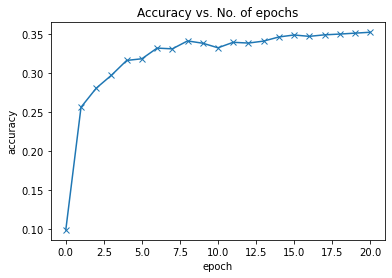

In [128]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');